<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/DataDay9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Neural Network**

In [2]:

import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# **Recurrent neural network**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 28539.9434
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29643.8672 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29744.3730 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30134.3027 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28789.7773 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29006.0840 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30708.3555 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29595.5117 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30460.1035  
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29146.9883 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28031.0078  
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29429.7773 
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28902.7480 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30803.4863 
Epoch 15/100

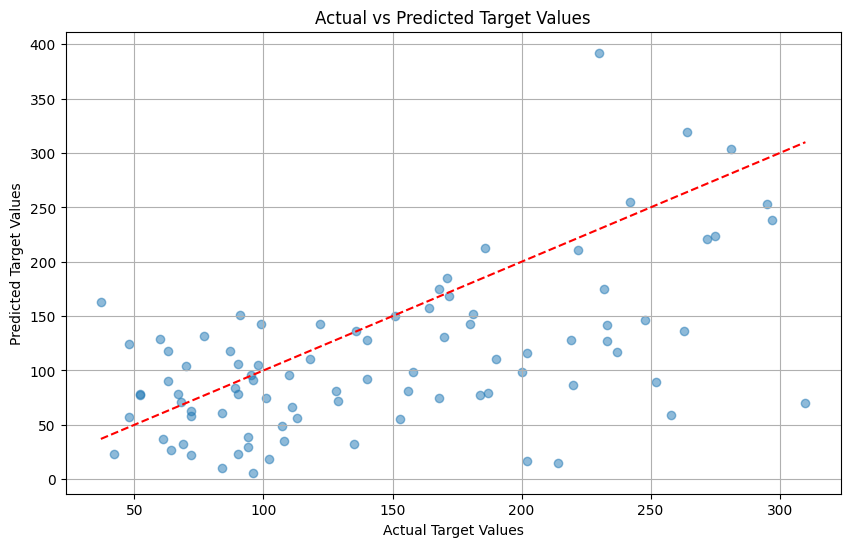

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


X = df.drop('target', axis=1).values
y = df['target'].values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


X = X.reshape(X.shape[0], 1, X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))) # input_shape = (timesteps, features)
model.add(Dense(1)) # Output layer with a single neuron for regression

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

loss = model.evaluate(X_test, y_test)
print("Mean Squared Error:", loss)

y_pred = model.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal prediction line
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs Predicted Target Values")
plt.grid(True)
plt.show()

# **Feedforward neural network**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 28866.0195
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30577.3066 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28831.4121 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29263.3652 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29742.7188 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28264.2480 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28992.3750 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29244.1543
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25779.5996  
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26463.0801
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26659.9453
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22766.0859
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22262.2402 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21299.7930  
Epoc

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


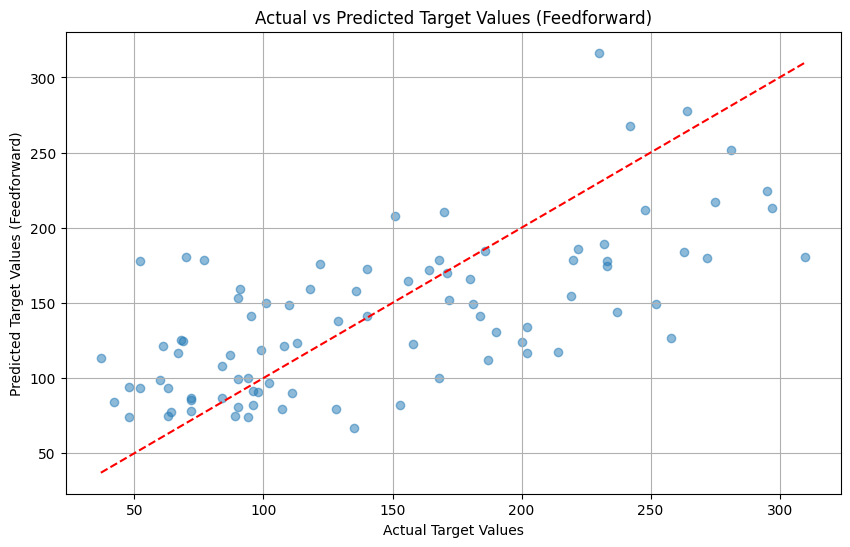

In [6]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df.drop('target', axis=1).values
y = df['target'].values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_ff = Sequential()
model_ff.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_ff.add(Dense(32, activation='relu'))
model_ff.add(Dense(1))

model_ff.compile(optimizer='adam', loss='mse')

model_ff.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

loss_ff = model_ff.evaluate(X_test, y_test)
print("Feedforward Neural Network Mean Squared Error:", loss_ff)

y_pred_ff = model_ff.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ff, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values (Feedforward)")
plt.title("Actual vs Predicted Target Values (Feedforward)")
plt.grid(True)
plt.show()

# **Long short-term memory (LSTM)**

LSTM Mean Squared Error: 5882.47119140625
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


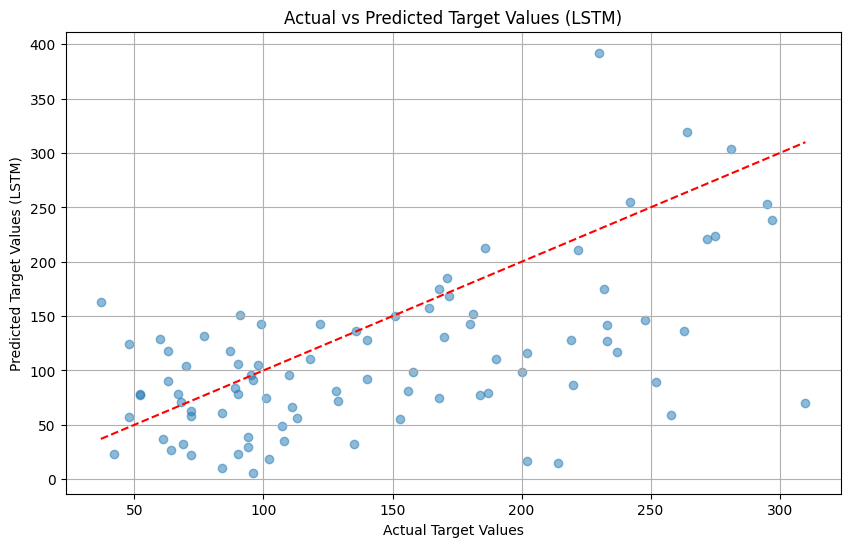

In [10]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
loss = model.evaluate(X_test, y_test, verbose=0)
print("LSTM Mean Squared Error:", loss)
y_pred_lstm = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lstm, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values (LSTM)")
plt.title("Actual vs Predicted Target Values (LSTM)")
plt.grid(True)
plt.show()

# **Convolutional neural network**

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 28531.5488
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29153.1621  
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30794.0547 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28345.5430 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29124.0938 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29102.6348 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28587.1523 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29757.2090 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26406.1660 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25049.6172 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26417.8555 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23862.7090 
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23317.2383 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22373.2441 
Epoch 15/100


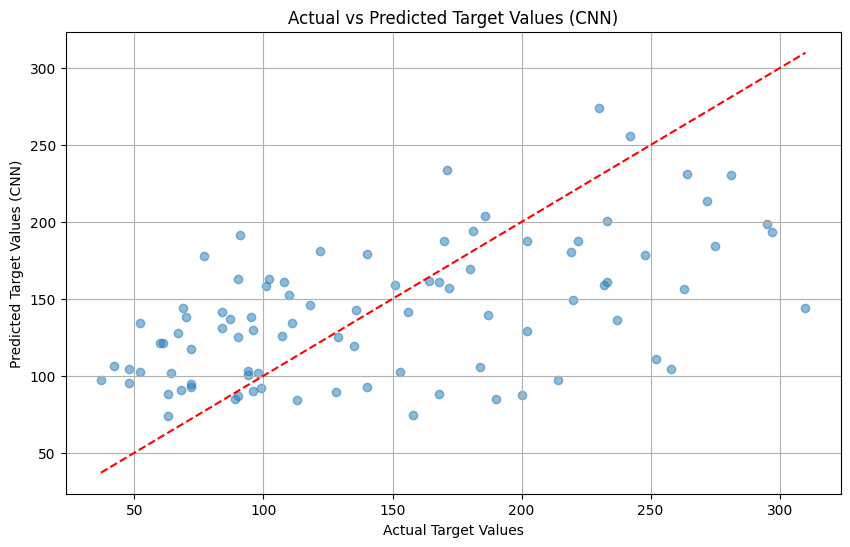

In [11]:

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt


X = df.drop('target', axis=1).values
y = df['target'].values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_cnn = Sequential()
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(16, activation='relu'))
model_cnn.add(Dense(1))

model_cnn.compile(optimizer='adam', loss='mse')

model_cnn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

loss_cnn = model_cnn.evaluate(X_test, y_test)
print("Convolutional Neural Network Mean Squared Error:", loss_cnn)

y_pred_cnn = model_cnn.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cnn, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values (CNN)")
plt.title("Actual vs Predicted Target Values (CNN)")
plt.grid(True)
plt.show()

# **Comparing Metrics (classification)**

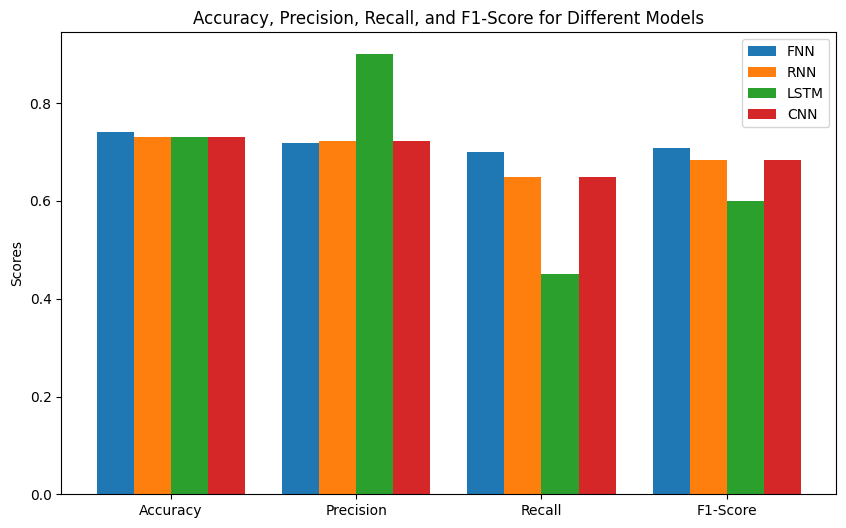

In [16]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


threshold = np.mean(y_test)
y_pred_classes = (y_pred > threshold).astype(int)
y_pred_ff_classes = (y_pred_ff > threshold).astype(int)
y_pred_lstm_classes = (y_pred_lstm > threshold).astype(int)
y_pred_cnn_classes = (y_pred_cnn > threshold).astype(int)

y_test_classes = (y_test > threshold).astype(int)

models = {
    "FNN": (y_test_classes,y_pred_ff_classes),
    "RNN": (y_test_classes,y_pred_classes),
    "LSTM": (y_test_classes,y_pred_lstm_classes),
    "CNN": (y_test_classes,y_pred_cnn_classes)
}

metrics = {"Accuracy": accuracy_score,
           "Precision": precision_score,
           "Recall": recall_score,
           "F1-Score": f1_score}

results = {}
for name, (y_true, y_pred_c) in models.items():
    results[name] = {}
    for metric_name, metric_func in metrics.items():
        try:
            results[name][metric_name] = metric_func(y_true, y_pred_c)
        except ValueError:
            results[name][metric_name] = 0

#Plot
metric_names = list(metrics.keys())
model_names = list(results.keys())
width = 0.2

x = np.arange(len(metric_names))

fig, ax = plt.subplots(figsize=(10,6))
for i, model_name in enumerate(model_names):
    ax.bar(x + i*width, [results[model_name][metric] for metric in metric_names], width, label=model_name)

ax.set_xticks(x + width*1.5)
ax.set_xticklabels(metric_names)
ax.set_ylabel("Scores")
ax.set_title("Accuracy, Precision, Recall, and F1-Score for Different Models")
ax.legend()
plt.show()

# **Comparing RMSE**

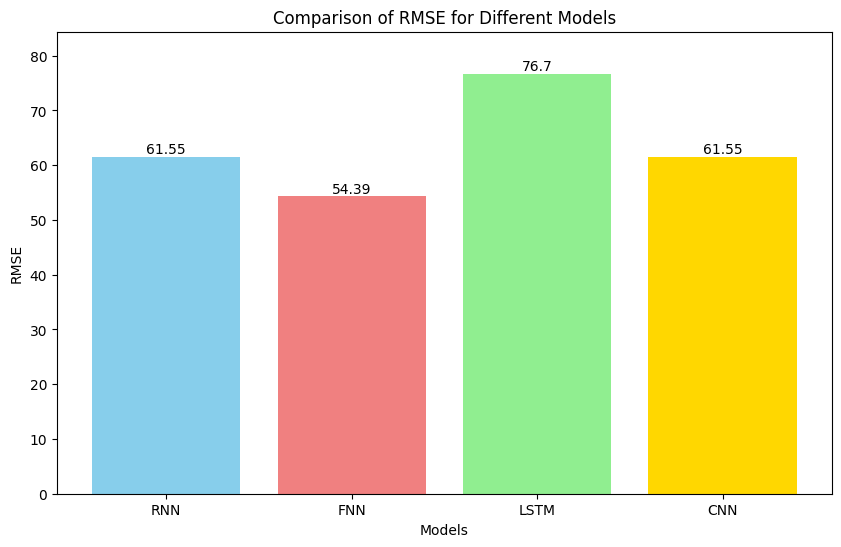

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error


rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_ffnn = np.sqrt(mean_squared_error(y_test, y_pred_ff))
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
rmse_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn))

models = ['RNN', 'FNN', 'LSTM', 'CNN']
rmse_values = [rmse_rnn, rmse_ffnn, rmse_lstm, rmse_cnn]
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmse_values, color=colors)

for bar, rmse in zip(bars, rmse_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(rmse, 2), ha='center', va='bottom')

plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Comparison of RMSE for Different Models")
plt.ylim(0, max(rmse_values) * 1.1)
plt.show()